# Session 4

**NEW FOR THIS SESSION: red <span style="color:red">Exercises</span> are the essential core material. Attempt these first before moving on to the exercises in black, and finally anything marked optional (in a yellow box) if you are interested. This will ensure you address all the main intended learning outcomes of this session. Note that the yellow-box optional material is for 'pick and choose' - there is enough there to fill entire summer term computing projects!**

## Index 
1. [Intended learning outcomes](#outcomes) 
2. [Roots of polynomials](#polynomials)
3. [Numerical equation solving](#solving)
4. [Optimisation](#optimisation)
5. [Solving systems of Ordinary Differential Equations](#ODE)

## 1. Intended learning outcomes<a id="outcomes"></a>
After this session, you should be able to:
- use Python to find the roots of polynomials,
- solve equations numerically,
- be able to choose a sensible initial guess to achieve the desired computed solution to equations,
- find the location of the minimum of a function, including using a sensible initial guess,
- model a system of Ordinary Differential Equations numerically.

## 2. Roots of polynomials<a id="polynomials"></a>
In the previous session we worked with polynomial functions to fit data. In numerical modelling, we can encounter problems where we will need to solve polynomials. To this end, Scipy includes the function <span style="color:blue">roots()</span> which finds solutions to polynomials very quickly. The only calling argument for <span style="color:blue">roots()</span> is an array containing the coefficient in front of each polynomial term; e.g. array $P$ where the array elements represent the following:

$$ f(x) = P[3] + P[2]x + P[1]x^2 + P[0]x^3$$

The function uses the size of the list to know what order of polynomial you are using. The output is an array with the solutions.

Below is an example to solve $x^2-2=0$:

In [0]:
import scipy as sp
import matplotlib.pyplot as plt # For later use
%matplotlib inline

In [4]:
a=[1,0,-2]
result = sp.roots(a)
print(result)

[-1.41421356  1.41421356]


**<span style="color:red">Exercise 1:</span> find the roots of $2x^5+3x^2=1$. Check that the roots are valid solutions (i.e. the value of the polynomial is zero at these points). Can you plot the poynomial and include an <span style="color:blue">if</span> statement that checks whether each solution is real, and if so overplot that solution on your graph? For this, the SciPy function <span style="color:blue">isreal()</span> is useful to determine if a number is real or complex.**

**Hint: the SciPy function <span style="color:blue">polyval()</span> calculates the y-values of a polynomial with given coefficients and x-values - this can be helpful to check if the solutions are valid**.


Note that the lab script for this session no longer includes empty run cells for you to insert your code. We recommend that you use the Spyder IDE to write your code, so you can get used to using the Spyder environment routinely. Of course you can still add code cells to your lab script to try out snippets of code or to help you create a narrative for later reference.


<div style="background-color: #FFF8C6">
More complicated example: use a random number generator to generate a 50th-order polynomial with integer coefficients between -5 and 5. Find the roots, print all valid solutions, and indicate them on a plot of the polynomial. 

## 3. Numerical equation solving<a id="solving"></a>
There are some equations which you cannot solve analytically. These include so called transcendental equations such as $x=\cos{x}$. Fortunately there are graphical and numerical approaches to solving such equations.

**<span style="color:red">Exercise 2:</span> create a plot of $f_1(x) = x$ and $f_2(x) = \cos{x}$ in the same graph. Repeatedely zoom in on the intersection point of the two functions to find an approximate solution to $x=\cos{x}$ to 5 significant figures. You can do this by setting the axes limits using the matplotlib functions <span style="color:blue">xlim()</span> and <span style="color:blue">ylim()</span>. What limits the resolution of your solution?**

There are various methods for solving equations numerically. Often these methods require you to make an initial guess as to what the solution of the equation might be. They then iterate to a better solution. One very famous method for iteratively solving equations is the Newton-Raphson method which dates back to the 17th century. This uses the value and gradient of the function at the current guess to generate an improved estimate of where a function crosses the x-axis. This is shown in the animation below:

![NewtonIteration_Animation](Images\NewtonIteration_Animation.gif)

(Image taken from Wikipedia (which is why the labels are in German): <http://en.wikipedia.org/wiki/File:NewtonIteration_Ani.gif>. Downloaded September 2017.)

At each iteration, the estimate of the solution, $x_n$ is replace by $x_{n+1}=x_n - \frac{f(x=x_n)}{f'(x=x_n)}$.

Below you can find an example block of code that solves $x=\cos{x}$ iteratively using this method. Note that in this case, the function needs to be defined as $f(x) = x - \cos{x}$ so that we can use the Newton-Raphson method to find $x - \cos{x} = 0$.

In [5]:
# Function that calculates the new estimate for x of intersection point
def update(x):
    return  x - ((sp.cos(x)-x)/(-sp.sin(x)-1))# Note that the derivative of cos(x) - x is -sin(x) - 1

x=0.5 # First guess of x-coordinate of intersection point
dx=x # dx is the change in x at each iteration. dx = x is the starting condition.

# Stop the while loop when dx is sufficiently small (i.e. accuracy of solution is sufficiently high)
while dx > 0.000000001 :
    xnew = update(x)# next estimate for x
    dx   = sp.absolute(x-xnew)# the change in x
    x    = xnew # update x to the new estimate for x
    
print(x)# the solution of the x of the intersection point
print(sp.cos(x)-x)# this should be zero if the solution is correct

0.7390851332151607
0.0


**<span style="color:red">Exercise 3:</span> Run the code above and pay attention to how quickly it converges. Now amend the code to show how many iterations the algorithm needs to find the solution. How robust is this algorithm (i.e. if you start it a long way from the solution does it still find the correct solution)?**

Note that creating our own iterative programme for the example above was quite easy as we could differentiate the function $f(x) = x - \cos{x}$ analytically. For more complicated examples, SciPy’s optimize package has several equation solvers, including one called <span style="color:blue">newton()</span> which uses the Newton-Raphson method. You can choose which algorithm to use for a particular problem, however initially, you are probably best advised to stick to the default equation solver called <span style="color:blue">fsolve()</span> which will be adequate for many problems.

**<span style="color:red">Exercise 4:</span> in the cell below is a simple example, which solves $-x^2+1 = 0$. Note that you are required to give an initial guess; try this code and see how the answer changes with the initial guess. What happens if you try an initial guess of 0 and why?**

[1.]


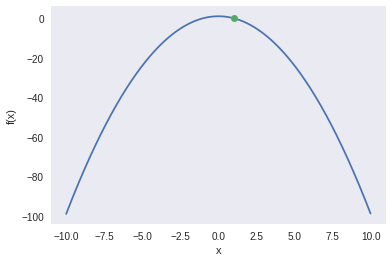

In [6]:
import scipy.optimize as op

#Our function to solve f(x) = 0
def func(x):
  return -x**2+1

initial_guess=0.5

# solve the function
solution = op.fsolve(func,initial_guess)
print(solution)

#now plot the curves to be sure
x=sp.arange(-10,10,0.01)
y=func(x)

plt.plot(x,y)
plt.plot(solution,func(solution),'o')# Overplot the solution found
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

The function <span style="color:blue">fsolve()</span> can be used to solve sets of non-linear equations with multiple variables. So for example if you wished to solve the set of equations:</b>

$$x+y=y\cos{y} \\ x^2+y^2=3$$

you can do so with the script below:

In [7]:
# Define the function - note that there are now 2 variables, given in 1 array argument
def two_equations(variables):
    #print(variables)# If you print variables, you will see which values the algorithm tries for x and y
    x,y = variables[0],variables[1]
    output = [x+y-y*sp.cos(y),x*x+y*y-3]# The function returns an array: 1 element per equation
    return output

initial_guess=[1,2]

solution = op.fsolve(two_equations,initial_guess)
print("Solution:", solution)
print("Checking the solution:", two_equations(solution))


Solution: [-1.07364009  1.35915303]
Checking the solution: [5.126177260450504e-12, 2.2531310150952777e-11]


By printing the output of the function when called with the numerical solution you can see how close the numerical solution actually is to the true solution. If you uncomment the print statement in the function you can see how quickly the algorithm converges.

It is important to understand if the solution makes sense and if it is the only solution. The first solution to which <span style="color:blue">fsolve()</span> iterates may be mathematically sound but might not be the solution that represents the physical situation you are modelling. Often graphing the solution can help (especially if you are only working in 2 variables). Below is a graph showing the two functions that we have been looking at and you can see that the solution found is only one of two possible solutions. 

![simultaneous_equations](Images\simultaneous_equations.png)

**Exercise 5: can you alter the example code above to find the other solution?**

**Exercise 6: Use <span style="color:blue">fsolve()</span> to solve the simultaneous equations:**

$$e^{-x}-y=0 \\ \sin{x}-y=0$$

**Is your solution unique? Plot both curves as well as your solution to check.**

<div style="background-color: #00FF00"> Discuss your work with a demonstrator.

## 4. Optimisation<a id="optimisation"></a>

You know how to minimise and maximise analytical functions that you can (doubly) differentiate; however you will often encounter complex systems that cannot be differentiated analytically. For these you need numerical techniques. Numerical techniques for optimization (almost always) in practice mean numerical techniques for minimisation. If your problem requires you to maximise a function then, in general, you redefine the problem so that you end up minimising something else. 

Numerical optimisation is an interesting and complicated area. SciPy has an optimize module that contains a plethora of different methods. However, until you become an expert, we suggest that you only use some of the main functions. A basic minimization function in the current release is <span style="color:blue">fmin()</span>. It does not use derivatives so can be used in cases where you don’t know the analytical function or its derivate. The numerical optimization starts at an initial guess and then iterates to a minimum. A simple 1-dimensional example illustrates this. The code below minimises the function $f(x) = x^2 + x$. Run the code cell - does it give the answer you would expect?

In [0]:
#define the function to be minimised

def func1(x):
     return x**2+x

#now minimise with a starting guess of 1
initial_guess = 1
x=op.fmin(func1,1)

print(x)

You may have noticed that the <span style="color:blue">fmin()</span> works along similar lines as <span style="color:blue">fsolve()</span>.

**<span style="color:red">Exercise 7:</span> modify <span style="color:blue">func1</span> in the code above so that it also prints out the value x that it is called with and run the optimization again.** 

This will give you insight into how <span style="color:blue">fmin()</span> finds the minimum. For further details of how fmin works use <span style="color:blue">help(op.fmin)</span>.

**<span style="color:red">Exercise 8:</span> now write a programme to minimise the function  $x^4−5x^3−20x^2+50x$ with an initial guesses of -4. Try the same process with an initial guess of 3. Plot the function and mark on it the initial guesses and the minima found in each case. Explain what has happened. What conclusions can you draw about how to use <span style="color:blue">fmin()</span>? **

<div style="background-color: #FFF8C6">
Let's take the minimisation exercise a bit further. Find the maximum of the 2-D function: $\sin(xy+y)\,e^{−(x^2+y^2)}$

So far we have used <span style="color:blue">fmin()</span> only to minimise (or optionally, maximise) given functions. Let's now apply it to a hypothetical problem.

**Exercise 9: A cyclist is biking along a path when he witnesses a child falling into the river. At this moment, the cyclist is at point $A$ and the child at point $B$, as shown in the picture below. The cyclist's maximum speed is 30 km/h on the path, but only 15 km/h on the grass separating the path from the river. At which point should the cyclist cross the grass to reach the child in the shortest time? How long does it take the cyclist to get to the child?**

![cyclist](Images\cyclist.jpg)

<div style="background-color: #00FF00"> Discuss your work on optimisation with a demonstrator.

<div style="background-color: #FFF8C6">
## Integration and Differentiation
After working through numerical optimisation, you may be wondering how differentiation and integration works with Python. This is an important area of programming, but quite lengthy to get the hang off properly. Should you wish to explore these topics (whether now or later on during your Physics career), [here](Computing Year 1 - Integration and Differentiation.ipynb) is a Jupyter Notebook with exercises to get you started.

## 5. Solving systems of Ordinary Differential Equations<a id="ODE"></a>

Many physical problems are described by ordinary differential equations (ODE). For example, radioactive decay of a sample of $N$ atoms can be described as:

$$\frac{dN}{dt} = -\alpha N.$$

Here $\alpha$ is the constant of proportionality. We already know how solve this particular differential equation analytically (in fact we used the solution already in Session 1); we will now demonstrate how to solve it numerically.

The simplest Scipy ODE solver (and which we recommend that you use) is <span style="color:blue">odeint()</span> which is part of the <span style="color:blue">scipy.integrate</span> package.

In order to use the ODE integrator you will have to define a function whose calling arguments are the variable to be differentiated and the variable with respect to which it will be differentiated. You will also need to specify the initial condition.

The code below contains an example, which uses <span style="color:blue">odeint()</span> to calculate the value of $N$ as a function of time $t$ and subsequently plots the result.

In [0]:
import scipy.integrate as spi

alpha = 0.0050228 #define constant of proportionality

# This function takes the variable to be differentiated, i.e. N as a function of t
def dif_func(N,t):
    dN_dt = -alpha*N # specify the derivative of N as a function of t (i.e. the differential equation)
    return dN_dt # returns differentiated values of N

# Create an array of time steps (1000 days in this instance)
t = sp.linspace(0.,1000.,10000) # solving every tenth of a second.

# set initial condition
N = 1000 # Starting with 1000 molecules
# Solve the differential equation
soln=spi.odeint(dif_func,N,t) # input arguments: function name, initial condition and timesteps

# Note: the variable soln now contains an array with the value of N at each time step t
# We can now plot N versus t

plt.grid()
plt.plot(t,soln)
plt.xlabel("Time (s)")
plt.ylabel("Number")

plt.show()

**<span style="color:red">Exercise 10:</span> run the example code and compare the result with what you would expect. Extend the code to find the half life of this radioactive sample. Which radioactive element was used for this example?**

### Higher-order ODEs: Newton's second law
In Physics, we often need to solve higher (at least second) order ODE, which can be hard to do analytically. Fortunately, higher order ODE can always be written down as a set of first order ODE. For example, through Newton’s second law, the position of an object is related to the force that it experiences by a second order ODE, however it can be written as a set of two first order ODE. I.e. for a force \(F(x)\) on a body of mass \(m\) we have

$$m\frac{d^2x}{dt^2} = F(x),$$

but this can be rewritten as the set of first order ODE:

$$\frac{dv}{dt}=F(x)/m,\quad\frac{dx}{dt}= v.$$

Let us consider the example of a particle moving in one dimension under gravity at the earth’s surface, with an initial velocity of $+10\rm\,ms^{-1}$ (which we define to be upwards so that gravity is in the negative direction). In this case our differential equations become:

$$\frac{dv}{dt}=-g,\quad\frac{dx}{dt}= v.$$

We can simulate this using the following code. Note that now we need to pass two variables to be differentiated ($x$ and $v$, both with respect to $t$) to our function. Pay close attention to how this works.


In [0]:
g = 9.8 #define magnitude of local gravity

# x and v are stored in an array called variables, and passed to the function, along with the time array t.
def dif_func(variables,t):
    x = variables[0] # x is in the first element of the array (as defined by the order of our initial guess below)
    v = variables[1] # v is in the second element of the array 
    a = -g # calculate the derivative of v (don't forget the acceleration is in the negative direction).
    return [v,a] # return an array containing the differentiated values of x and v i.e. [dx/dt, dv/dt]

# Create an array with time steps (2.5 seconds in this case)
t = sp.linspace(0.,2.5,100) # 100 time steps

# set initial conditions going up at 10 ms^-1 starting at ground level
variables0=[0.,10]

# solve the ODEs
soln=spi.odeint(dif_func,variables0,t) # input arguments: function name, initial conditions and timesteps

xsol = soln[:,0] # the calculated values of x as a function of t are in the first column of the returned array
vsol = soln[:,1] # the calculated values of v as a function of t are in the second column of the returned array

plt.rcParams.update({'figure.figsize': [15, 6]} )# Create a large figure to accommodate 2 sub plots

# Plot height as a function of time 
plt.subplot(1,2,1)
plt.grid()
plt.plot(t,xsol)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")

# Plot velocity as a function of time 
plt.subplot(1,2,2)
plt.grid()
plt.plot(t,vsol)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.show()

Make sure you understand how the code above works. Note how the algorithm does not take into account whether the solution makes any physical sense - for example the particle reaches the ground ($x=0$) just after 2 seconds, but the solutions for $x$ and $v$ are calculated up until 2.5 s regardless. 

<div style="background-color: #FFF8C6">

Can you amend the code above to take into account what happens when the particle hits the ground (assuming a completely inelastic collision, where the particle loses all its energy instantaneously)? Hint: work with the array containing the solutions after the ODEs have been solved, instead of editing the function containing the differential equations.

**Exercise 11: of course the example above can be solved analytically as well with the $suvat$ equations. Calculate the analytical solution - how does it compare with the numerical solution? Plot the error of the numerical solution (i.e. the analytical solution minus the numerical solution) as a function of time.**

In the example above we have neglected air resistance. We are now going to make our scenario more realistic by adding in air resistance, where the force due to air resistance $F_{\rm air}$ is proportional to the square of the velocity $v$ of the object:

$$ F_{\rm air}(v) = -\frac{1}{2}\rho A C v^2.$$

Here $\rho$ is the density of air, $A$ is the cross section of the object (i.e. $\pi r^2$ for a sphere) and $C$ is the drag coefficient (typically 0.47 for a spherical object).

**<span style="color:red">Exercise 12:</span> model the motion of a tennis ball thrown straight up into the air in a similar manner to the example above, but including air resistance. Compare the cases with and without air resistance by plotting them in the same graph. Hint: start by writing out the new equation of motion and finding $dv/dt$. Think carefully about the sign of the drag force!**

**Exercise 13: now, model the motion of a tennis ball dropped from the Tower of Pisa. What is the terminal velocity of the ball (i.e. the maximum velocity the ball can reach)? What would be the result of the exact same experiment if the Tower of Pisa was located on Venus?** 

<div style="background-color: #FFF8C6">

You can use your model to investigate a wide range of different questions. For example, can you derive how the terminal velocity depends on the mass of the ball? Hint: be careful what mass range you choose to investigate. Why is this important?

Feel free to explore other questions and show your results to a demonstrator.

<div style="background-color: #FFF8C6">

### Harmonic Oscillators

If you are interested in numerical modelling and would like to spend more time on it, try the scenarios below. Each box takes the model a step further and hence becomes more challenging - you can decide for yourself how far you want to take it. 


<div style="background-color: #FFF8C6">

#### Simple harmonic motion

Consider a mass attached to a spring lying on a frictionless surface as shown in the figure. 

![spring](Images\spring.jpg)

According to Hooke's law, the restoring force on the mass is directly proportional to the extension of the spring so :

$$
m\frac{d^2x}{dt^2}=-kx
$$

Where $k$ is the spring constant for that spring.

This can be rewritten as 

$$
\frac{d^2x}{dt^2} = - \omega_0^2 x
$$

where $\omega_0= \sqrt{k/m}.$

Write this second order differentional equation as a series of first order differential equations and create a simulation of a similar system with a spring constant $k=18\,\rm Nm^{-1}$ and a mass of 0.5 kg. Plot both the position and the velocity of the mass if intitally you extend the spring by 10 cm. Run your simulation for 10 s. You should think about what is happening to the energy in this system.

<div style="background-color: #FFF8C6">

#### Damped harmonic motion

In the next step, we replace the frictionless surface with different surfaces with different amounts of friction. However in each case the friction is proportional to the velocity (i.e. $F=-bv$) so the equation of motion becomes:

$$
m\frac{d^2x}{dt^2} +b\frac{dx}{dt} +k x=0
$$

where b is a constant for the particular surface.
This is often written as:

$$
\frac{d^2x}{dt^2} +\gamma\frac{dx}{dt}+  \omega_0^2 x =0
$$

Here $\gamma = b/m$. Modify your simulations to include this damping. Investigate how the motion changes with different values of $b$. Specifically, try values of $b$ that are less than $6$, $b=6$ and values for $b$ that are much greater than $6$. You should try to describe what you see and decide whether or not the motion is oscillatory or not. Again, think about what is happening to the energy in this system.

<div style="background-color: #FFF8C6">

#### Forced oscillators

Taking it another step forward, we can consider that instead of being attached to a fixed wall the spring is attached to a moving oscillator that is oscillating with an amplitude of 5 cm and a frequency $\Omega$.

Incorporate this into your simulation. To do this, you will need to use that the driving force exerted by the moving oscillator is $F_{\rm dr} = kA\cos{(\Omega t)}$, where $A$ is the amplitude of the oscillation. This time, start with with you mass at rest at the unextended length of the spring. Investigate the motion of the mass for different values of $\Omega$. You might want to especially consider both the situation where the damping is light (i.e. $b$ is quite small) and where damping is very heavy (i.e. $b$ is very large). You should run you simulation for more than 10s (perhaps 100s is better here but do investigate how the mass goes from stationary to its final motion). Take care to look at the amplitude of the motion.

<div style="background-color: #FFF8C6">

#### Coupled oscillators

Finally, consider a situation where you have two equal masses connected to two fixed surfaces by springs with a constant $k_1=18\rm\,N\,m^{-1}$. However they are also coupled to each other by a spring of constant $k_2$, as shown below.

![coupled_spring](Images\coupled_springs.png)

If the surface is now frictionless (again) their equations of motion become:

$$
m\frac{d^2x_1}{dt^2}=-x_1 k_1+(x_2-x_1)k_2 \\
m\frac{d^2x_2}{dt^2}=-x_2 k_1+(x_1-x_2)k_2 
$$

Rearrange these into a set of four first differential equations. Write a simulation of this situation. I suggest that you start with $k_2$ being a lot smaller than $k_1$. Start the simulation with just one of the masses displaced from its equilibrium situation by 10 cm and everything else is at rest. What is happening to the energy here? 

<div style="background-color: #00FF00">Discuss your work on Ordinary Differential Equations with a demonstrator. </div>

## Please complete the [Mentimeter Poll](https://www.menti.com/2a5f72) for this session 